In [1]:
import torch
import torchvision
import torch.nn as nn

import numpy as np 
import sklearn
import pandas as pd 
import matplotlib.pyplot as plt 
import math

USE_CUDA = torch.cuda.is_available()

NUM_in = 1
NUM_out = 1
NUM_HIDDEN = 5

In [2]:
#定义模型
model = torch.nn.Sequential(
    torch.nn.Linear(NUM_in,NUM_HIDDEN),
    torch.nn.LogSigmoid(),
    torch.nn.Linear(NUM_HIDDEN,NUM_out)
)
if USE_CUDA:
    model = model.cuda()

In [3]:
#定义损失函数和优化策略
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.005)

In [4]:
#读取训练数据
train_addr = "NR-Train-20.csv"
test_addr = "NR-Test-20.csv"
data = pd.read_csv(train_addr,header=None).values
x_train = torch.tensor(data[:,0])
y_train = torch.tensor(data[:,1])
data = pd.read_csv(test_addr,header=None).values
x_test = torch.tensor(data[:,0])
y_test = torch.tensor(data[:,1])

#转成列向量，-1表示自动计算，转化为len*1的相量
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

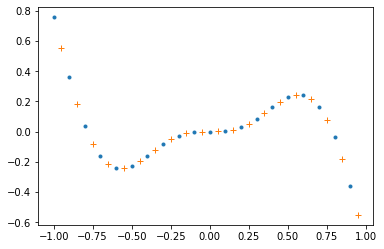

In [5]:
plt.plot(x_train,y_train,'.')
plt.plot(x_test,y_test,'+')

In [6]:
#转化为GPU Tensor
if USE_CUDA:
    x_train = x_train.cuda()
    y_train = y_train.cuda()
    x_test = x_test.cuda()
    y_test = y_test.cuda()

In [7]:
#训练模型
for epoch in range(50000):
    y_pred = model(x_train.float())
    loss = loss_fn(y_train,y_pred)

    if epoch % 200 == 0:
        print("Epoch", epoch, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch 0 0.08822362850478131
Epoch 200 0.05421671823697362
Epoch 400 0.04422352936524325
Epoch 600 0.02503648698856436
Epoch 800 0.011811162401213196
Epoch 1000 0.010178776819295873
Epoch 1200 0.008305007126824315
Epoch 1400 0.006324316032596356
Epoch 1600 0.0051909999285670635
Epoch 1800 0.004622761565093638
Epoch 2000 0.004170952011044071
Epoch 2200 0.0037853368690615383
Epoch 2400 0.0034378652678403935
Epoch 2600 0.0032082848221231496
Epoch 2800 0.002870823545493402
Epoch 3000 0.0026170558947836878
Epoch 3200 0.0023801730583102756
Epoch 3400 0.0021431000292989337
Epoch 3600 0.0018893707309425806
Epoch 3800 0.0016153009727431457
Epoch 4000 0.0013211260818392228
Epoch 4200 0.0010465614291811562
Epoch 4400 0.0009919913367213646
Epoch 4600 0.0008609013938981413
Epoch 4800 0.0004153140363270235
Epoch 5000 0.0002934112262508404
Epoch 5200 0.00020563125238274161
Epoch 5400 0.0001434607919767044
Epoch 5600 0.00010139166433546613
Epoch 5800 7.386758650722187e-05
Epoch 6000 5.808281355201671e-

In [8]:
torch.save(model,"LinearReg.pth")

In [9]:
#用训练好的模型进行计算
with torch.no_grad():
    y_pred = model(x_test.float())
